In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
country_wise = pd.read_csv("country_wise_latest.csv")

In [3]:
top10=country_wise.sort_values(
    by = "Confirmed",
    ascending=False
).head(10)

In [4]:
top10

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


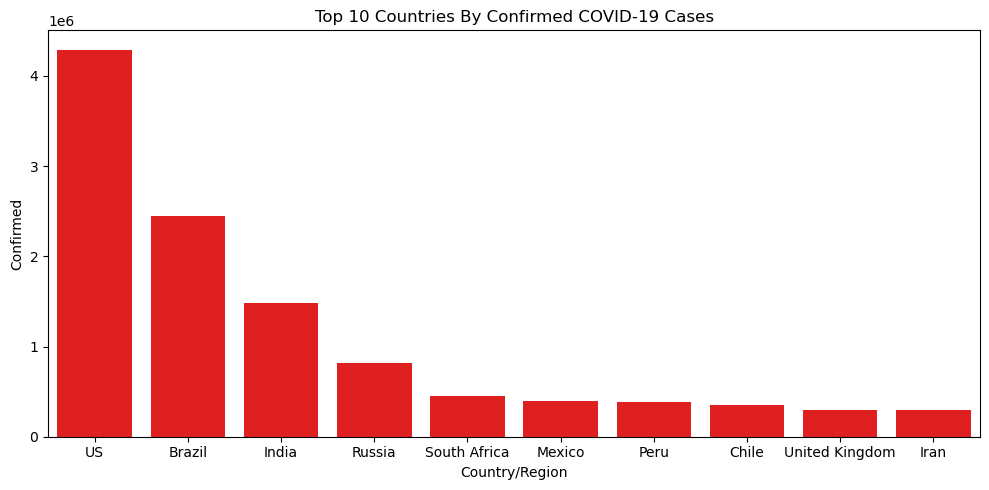

In [5]:
#Barplot
plt.figure(figsize=(10,5))
sns.barplot(
    data=top10,
    x="Country/Region",
    y="Confirmed",
    color="red"
)
plt.title("Top 10 Countries By Confirmed COVID-19 Cases")
plt.tight_layout()
plt.show()

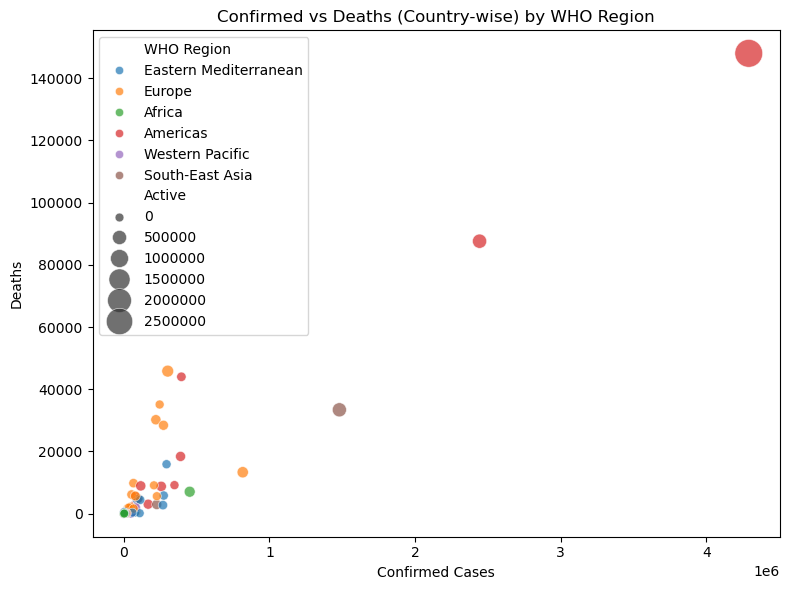

In [6]:
#ScatterPlot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=country_wise,
    x="Confirmed",
    y="Deaths",
    hue="WHO Region",
    size="Active",
    sizes=(40,400),
    alpha=0.7
)
plt.title("Confirmed vs Deaths (Country-wise) by WHO Region")
plt.xlabel("Confirmed Cases")
plt.tight_layout()
plt.show()

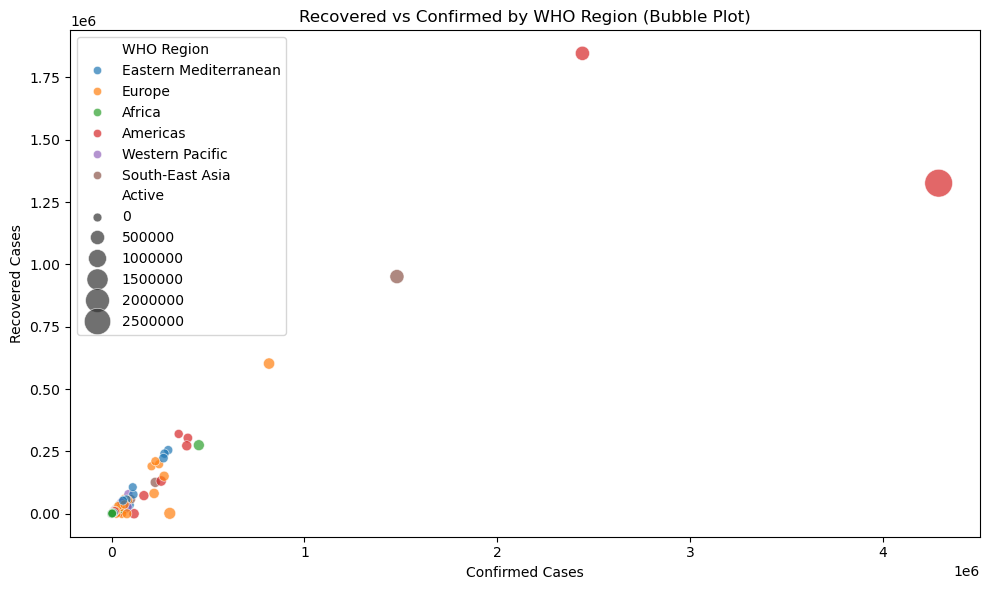

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=country_wise,
    x="Confirmed",
    y="Recovered",
    hue="WHO Region",
    size="Active",
    sizes=(40, 400),
    alpha=0.7
)

plt.title("Recovered vs Confirmed by WHO Region (Bubble Plot)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Recovered Cases")
plt.tight_layout()
plt.show()

In [22]:
country_wise["Death_Percentage"] = (
    country_wise["Deaths"] / country_wise["Confirmed"] ) * 100

top10_death_pct = country_wise.sort_values(
    by="Death_Percentage",
    ascending=False
).head(10)

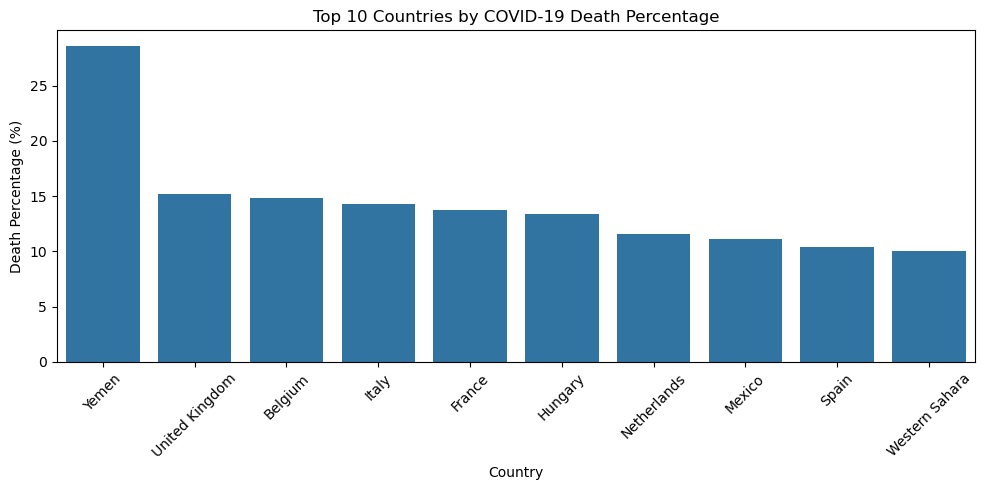

In [23]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=top10_death_pct,
    x="Country/Region",
    y="Death_Percentage"
)

plt.title("Top 10 Countries by COVID-19 Death Percentage")
plt.xlabel("Country")
plt.ylabel("Death Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

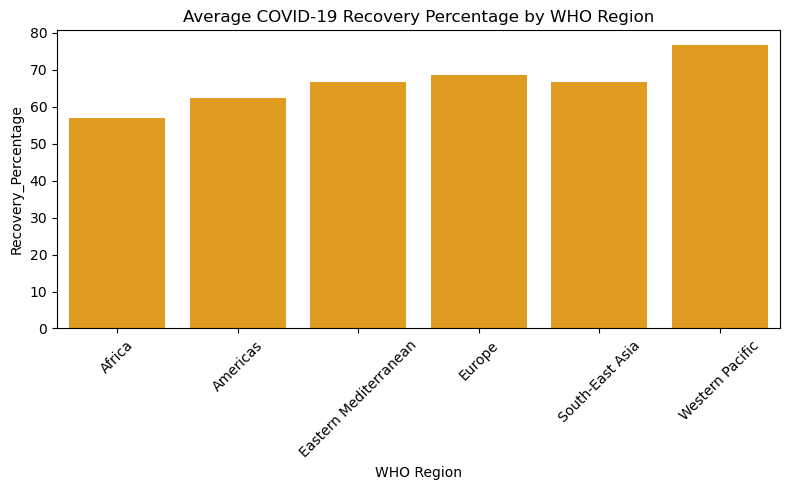

In [25]:
country_wise["Recovery_Percentage"] = (
    country_wise["Recovered"] / country_wise["Confirmed"]
) * 100

recovery_region = (
    country_wise
    .groupby("WHO Region")["Recovery_Percentage"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=recovery_region,
    x="WHO Region",
    y="Recovery_Percentage",
    color="orange"
)

plt.title("Average COVID-19 Recovery Percentage by WHO Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()